<a href="https://colab.research.google.com/github/micheal0034/Rainfall-Prediction/blob/main/Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

In this kernel, we will try to answer the question that whether or not it will rain tomorrow in Australia. We implement Logistic Regression with Python and Scikit-Learn.

To answer the question, we build a classifier to predict whether or not it will rain tomorrow in Australia. We train a binary classification model using Logistic Regression. I have used the Rain in Australia dataset for this project.

So, let's get started.

###**Importing the neccessary libraries**



In [97]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###**Loading the dataset**

In [98]:
rainfall = pd.read_csv('weatherAUS.csv')
rainfall.head(n=2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


###**Data Preperation**
> Now we are going to fclean the dataset before modelling

In [99]:
# Dimension of the dataest
shape = rainfall.shape
print("The number of instances and variables are = {}".format(shape))

The number of instances and variables are = (145460, 23)


In [100]:
# Columns of the dataset
rainfall.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [101]:
# Summary of the dataset
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Observation**

* We can see that we have both categorical and numerical dtype
* Categorical dtype is **object**
* Numerical dtype is **float**
* We also observed that there are lots of missing values in this dataset

**Conclusion on this observation**

* Check the missing values in each columns and decide whether to fillna or dropna
 

In [102]:
#Check the total missing values in each columns
null_value = rainfall.isnull().sum()
percentage_missing = rainfall.isnull().sum()/rainfall.shape[0]*100

values = {
    'null value' : null_value,
    'percentage missing' : percentage_missing,
    'dtypes' : rainfall.dtypes
}

total = pd.DataFrame(values).sort_values(by='percentage missing', ascending=False)
total.head(n=6)

,null value,percentage missing,dtypes
Sunshine,69835,48.009762,float64
Evaporation,62790,43.166506,float64
Cloud3pm,59358,40.807095,float64
Cloud9am,55888,38.421559,float64
Pressure9am,15065,10.356799,float64
Pressure3pm,15028,10.331363,float64


In [103]:
isnull = rainfall.isnull().values.sum()
notnull = rainfall.notnull().values.sum()
print("The total number of missing values in the dataset is {}".format(isnull))
print("The total number of non-missing values in the dataset is {}".format(notnull))

The total number of missing values in the dataset is 343248
The total number of non-missing values in the dataset is 3002332


**Observation**

Still in considering whether to use fillna() or dropna(), we have to consider:

* Target Variables
* Features Variables

#### **UNIVARIANTE ANALYSIS**

**Target Variable**

> Since we are making prediction for rainfall our target variable is **RainTomorrow**

In [104]:
isna = rainfall['RainTomorrow'].isna().sum()
notnull = rainfall['RainTomorrow'].notnull().sum()
print("The total number of missing values in the target variables is {}".format(isna))
print("The total number of non-missing values in the target variables is {}".format(notnull))

The total number of missing values in the target variables is 3267
The total number of non-missing values in the target variables is 142193


In [105]:
rainfall['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

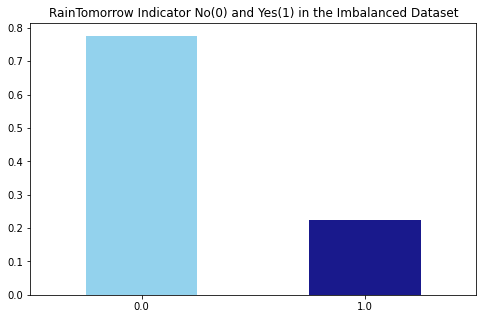

In [106]:
fig = plt.figure(figsize = (8,5))
rainfall.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

**Conclusion on this observation**

> From the analysis above we can see that we can't proceed with this target dataset because it is **imbalanced** i.e the number of variables to be used for predictions are smaller than expected.

**What can be done ?**

> In this kind of scenerio we would have to oversample the minority in other to balance the dataset.

In [107]:
from sklearn.utils import resample

no = rainfall[rainfall.RainTomorrow == 0]
yes = rainfall[rainfall.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no,yes_oversampled])

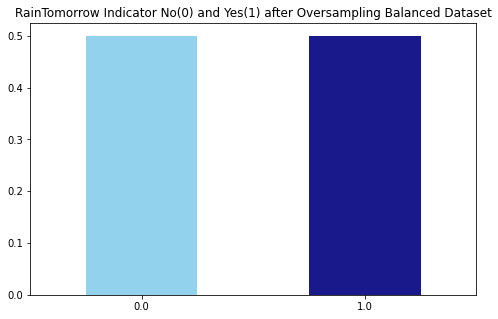

In [108]:
fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind = 'bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling Balanced Dataset')
plt.show()

In [109]:
new = oversampled['RainTomorrow'].isna().sum()
print("The total number of missing values in target column is {}".format(new))

The total number of missing values in target column is 0


**Observation**

>From the analysis above we can say that we have not only balanced the target variable for effective predictions but we have also filled the target variable missing data.

**What to do ?**

>We still have the feature variables to deal with (missing values).


**Feature Variables**

All except the target variable are the feature varaibles.

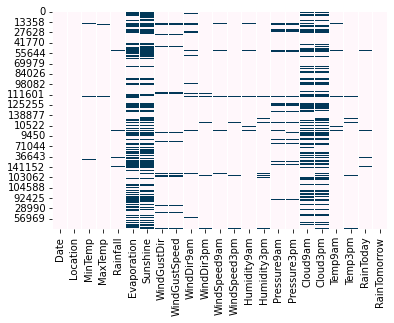

In [110]:
# Examining the missing values with a seabor plot
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [111]:
# Examining the total percentage of missing values in tabular form
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count())
missing = pd.concat([total, percent], axis = 1,keys=['Total','Percent'])
missing.head(n=6)

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664
Pressure3pm,21746,0.098562
Pressure9am,21728,0.098481


**Observations**

> We can deduce that there are more missing values in the dataset.

**What can be done ?**

> * Firstly work on the missing catergorical columns (object)
> * Then work on the missing numerical columns (float)

 #### **BIVARIATE ANALYSIS**

##### **Missing Categorical columns**

In [112]:
# Previewing all categorical columns
cartegorical = oversampled.select_dtypes(include=['object']).columns
cartegorical

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object')

>Labels are called Cardinality in Machine Learning Modellings.

> Lets take note of labels in categorical data's, the more the labels the harder it is to make predictions.

In [116]:
for var in cartegorical:
  print(var, ' contains ', len(oversampled[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels


###### **Date**

**Observations**

* We can see that 'Date' has 3436 labels which could be a very big problem, let's so some preprocessing on date to reduce its cardinality

> **What to do ?**
>
> * convert date column to datatime format from object
> * then work on other catergorical columns
> * Drop the original Date column from the dataset

In [117]:
# Convert date column to datetime format
oversampled['Date'] = pd.to_datetime(oversampled['Date'])

In [118]:
# Extract Year, Month and Day from the Date column
oversampled['Year'] = oversampled['Date'].dt.year
oversampled['Month'] = oversampled['Date'].dt.month
oversampled['Day'] = oversampled['Date'].dt.month

In [119]:
# Drop the date column
oversampled.drop('Date', axis=1, inplace = True)

> * Seeing that we have been able to extract the Date column to datetime, lets work on the other catergorocal data one at a time.

In [120]:
cartegorical = oversampled.select_dtypes(include=['object']).columns
cartegorical.to_list()

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [121]:
# Check for missing values in categorical variables 
oversampled[cartegorical].isnull().sum()

Location           0
WindGustDir    15491
WindDir9am     14728
WindDir3pm      6440
RainToday       3124
dtype: int64

###### **Location**

**Observations**

> * Location has 49 labels
> * Lets find a way to remove the labels

**What can be done ?**
> * let's do One Hot Encoding of Location variable, 
> * Get k-1 dummy variables after One Hot Encoding,
> * Preview the dataset

In [122]:
oversampled['Location'].value_counts()

Portland            5645
Sydney              5494
Cairns              5306
Dartmoor            5269
MountGambier        5264
Darwin              5259
Albany              5230
NorfolkIsland       5163
Witchcliffe         5142
CoffsHarbour        5114
Walpole             5101
Hobart              5097
Canberra            5000
Brisbane            4972
Ballarat            4935
SydneyAirport       4933
NorahHead           4922
MountGinini         4900
Watsonia            4857
GoldCoast           4823
Launceston          4818
Newcastle           4787
Adelaide            4772
Wollongong          4744
Perth               4681
Sale                4627
MelbourneAirport    4590
Albury              4550
Nuriootpa           4463
Tuggeranong         4439
PerthAirport        4436
Penrith             4416
Bendigo             4413
BadgerysCreek       4374
WaggaWagga          4291
Richmond            4264
Townsville          4261
Williamtown         4234
SalmonGums          4144
PearceRAAF          4042


In [123]:
pd.get_dummies(oversampled['Location'], drop_first=True).head(n=2)

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### **WindGustDir**

**Observations**

> * WindGustDir has 17 labels
> * Lets find a way to remove the labels

**What can be done ?**
> * let's do One Hot Encoding of Location variable, 
> * Get k-1 dummy variables after One Hot Encoding,
> * Add a column for nan
> * Preview the dataset

In [124]:
oversampled['WindGustDir'].value_counts()

W      16156
N      15042
WSW    13959
S      13866
WNW    13636
NW     13541
SE     13485
SSE    13374
SSW    13310
SW     13221
E      12388
NNW    11236
ENE    11210
NE     10387
ESE    10256
NNE    10074
Name: WindGustDir, dtype: int64

In [125]:
pd.get_dummies(oversampled['WindGustDir'], drop_first=True, dummy_na=True).head(n=2)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


###### **WindDir9am**

**Observations**

> * WindDir9am has 17 labels
> * Lets find a way to remove the labels

**What can be done ?**
> * let's do One Hot Encoding of Location variable, 
> * Get k-1 dummy variables after One Hot Encoding,
> * Add a column for nan
> * Preview the dataset

In [126]:
oversampled['WindDir9am'].value_counts()

N      20113
NW     14403
NNW    13874
W      13612
NNE    12963
SW     12956
SE     12909
SSE    12894
S      12675
E      12307
WNW    11892
SSW    11540
NE     11413
ENE    11110
WSW    10944
ESE    10299
Name: WindDir9am, dtype: int64

In [127]:
pd.get_dummies(oversampled['WindDir9am'], drop_first=True, dummy_na=True).head(n=2)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


###### **WindDir3pm**

**Observations**

> * WindDir3pm has 17 labels
> * Lets find a way to remove the labels

**What can be done ?**
> * let's do One Hot Encoding of Location variable, 
> * Get k-1 dummy variables after One Hot Encoding,
> * Add a column for nan
> * Preview the dataset

In [128]:
oversampled['WindDir3pm'].value_counts()

W      16096
SE     15701
S      14758
N      14656
WSW    14491
WNW    14432
NW     14321
SW     13632
SSE    13612
NNW    13022
SSW    12413
NE     12068
ESE    11855
E      11796
ENE    11070
NNE    10269
Name: WindDir3pm, dtype: int64

In [129]:
pd.get_dummies(oversampled['WindDir3pm'], drop_first=True, dummy_na=True).head(n=2)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [130]:
pd.get_dummies(oversampled['WindDir3pm'], drop_first=True, dummy_na=True).sum(axis=0)

ENE    11070
ESE    11855
N      14656
NE     12068
NNE    10269
NNW    13022
NW     14321
S      14758
SE     15701
SSE    13612
SSW    12413
SW     13632
W      16096
WNW    14432
WSW    14491
NaN     6440
dtype: int64

###### **RainToday**

**Observations**

> * RainToday has 3 labels
> * Lets find a way to remove the labels

**What can be done ?**
> * let's do One Hot Encoding of Location variable, 
> * Get k-1 dummy variables after One Hot Encoding,
> * Add a column for nan
> * Preview the dataset

In [131]:
oversampled['RainToday'].value_counts()

No     150151
Yes     67357
Name: RainToday, dtype: int64

In [132]:
oversampled['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [133]:
pd.get_dummies(oversampled['RainToday'], drop_first=True, dummy_na=True).head(n=2)

,Yes,NaN
0,0,0
1,0,0


In [134]:
pd.get_dummies(oversampled['RainToday'], drop_first=True, dummy_na=True).sum(axis=0)

Yes    67357
NaN     3124
dtype: int64

##### **Missing Numerical columns**

In [135]:
# Previewing all categorical columns
numerical = oversampled.select_dtypes(include=['float64','int64']).columns
numerical
print('There are {} numerical variables\n'.format(len(numerical)))

There are 20 numerical variables



**Observations**

> We can deduce that there are 20 numerical variables in the dataset.

**What can be done ?**

> * Exploration of numerical variables

In [136]:
oversampled[numerical].isnull().sum()

MinTemp            1082
MaxTemp             471
Rainfall           3124
Evaporation       95411
Sunshine         104831
WindGustSpeed     15354
WindSpeed9am       2206
WindSpeed3pm       4353
Humidity9am        3171
Humidity3pm        6031
Pressure9am       21728
Pressure3pm       21746
Cloud9am          81339
Cloud3pm          85614
Temp9am            1653
Temp3pm            4558
RainTomorrow          0
Year                  0
Month                 0
Day                   0
dtype: int64

**Observations**

> * Let's check for outliers in the numerical variables, because of the suspision of so many missing data's in each columns.
>
> check the link to know more about outliers [About Outliers](https://medium.com/@michealedekin/what-is-an-outlier-9c0526b4bce5)

**What to do next ?**
> * Use statistical method to view outliers
> * Check if they are normal or skewed distribution
> * Normal distribution == Extreme value analysis
> * Skewed distribution == IQR (Interquatile Range)

In [137]:
print(round(oversampled[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  219550.0  220161.0  217508.0     125221.0  115801.0       205278.0   
mean       13.0      22.0       4.0          5.0       6.0           42.0   
std         6.0       7.0      11.0          4.0       4.0           15.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      17.0       0.0          2.0       3.0           31.0   
50%        12.0      22.0       0.0          4.0       7.0           41.0   
75%        17.0      27.0       2.0          7.0      10.0           50.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      218426.0      216279.0     217461.0     214601.0     198904.0   
mean           15.0          19.0         72.0         58.0       1016.0   
std             9.0           9.0         19.0         22.0          7.0   
mi

**Observations**

> On closer inspection, i found out that 
>
>```
Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm
>```
> all contains outliers.

**What to do?**

> * Let's further analyse these columns with a boxplot

Text(0, 0.5, 'WindGustSpeed')

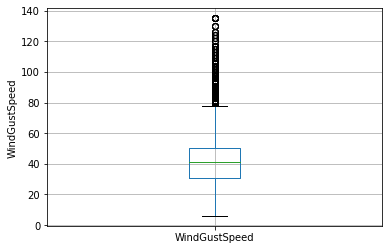

In [138]:

fig = oversampled.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

Text(0, 0.5, 'WindSpeed3pm')

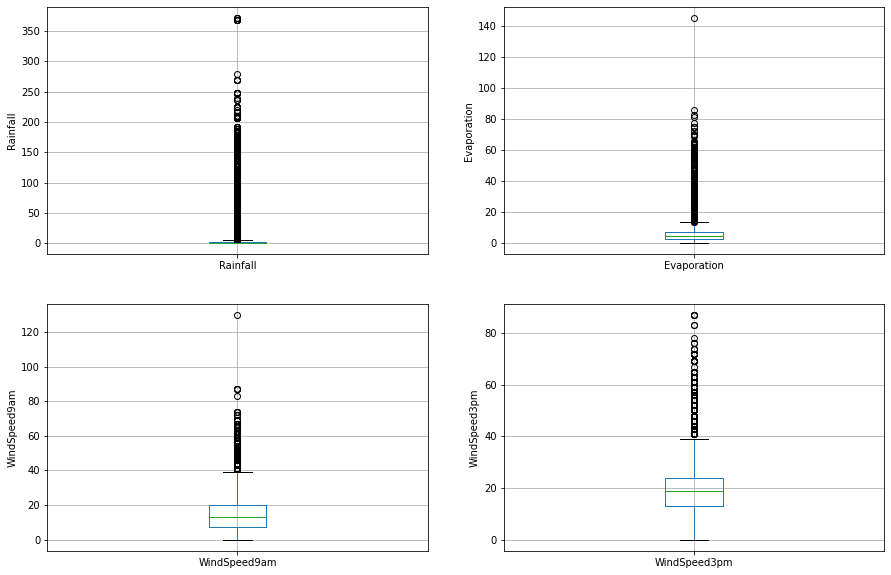

In [139]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = oversampled.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = oversampled.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = oversampled.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = oversampled.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')


>> * We can see there are outliers in the above plots
>
> * Now let's check if they are skewed or normal

Text(0, 0.5, 'RainTomorrow')

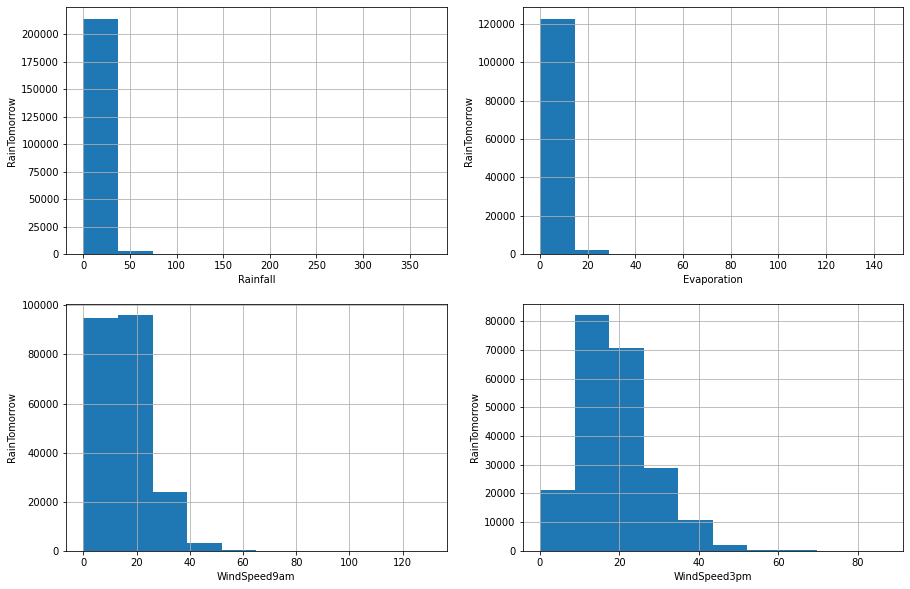

In [140]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = oversampled.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = oversampled.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = oversampled.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = oversampled.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

> * Now we can see that all columns are skewed i.e right sided skewed so we would use IQR

In [160]:
# Find outliers for Rainfall variable

IQR = oversampled.Rainfall.quantile(0.75) - oversampled.Rainfall.quantile(0.25)
Lower_fence = oversampled.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = oversampled.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -6.6000000000000005 or > 8.8


**Observations**

For Rainfall 
* Min value = 0.0
* Max value = 371.0
* Outliers value = 8.8

In [161]:
# Find outliers for Evaporation variable

IQR = oversampled.Evaporation.quantile(0.75) - oversampled.Evaporation.quantile(0.25)
Lower_fence = oversampled.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = oversampled.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.399999999999999 or > 20.799999999999997


**Observations**

For Evaporation 
* Min value = 0.0
* Max value = 145.0
* Outliers value = 20.8

In [162]:
# Find outliers for WindSpeed9am variable

IQR = oversampled.WindSpeed9am.quantile(0.75) - oversampled.WindSpeed9am.quantile(0.25)
Lower_fence = oversampled.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = oversampled.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -32.0 or > 59.0


**Observations**

For WindSpeed9am 
* Min value = 0.0
* Max value = 130.0
* Outliers value = 59.0

In [163]:
# Find outliers for WindSpeed3pm variable

IQR = oversampled.WindSpeed3pm.quantile(0.75) - oversampled.WindSpeed3pm.quantile(0.25)
Lower_fence = oversampled.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = oversampled.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


**Observations**

For WindSpeed3pm 
* Min value = 0.0
* Max value = 87.0
* Outliers value = 57.0

In [164]:
# Find outliers for WindGustSpeed variable

IQR = oversampled.WindGustSpeed.quantile(0.75) - oversampled.WindGustSpeed.quantile(0.25)
Lower_fence = oversampled.WindGustSpeed.quantile(0.25) - (IQR * 3)
Upper_fence = oversampled.WindGustSpeed.quantile(0.75) + (IQR * 3)
print('WindGustSpeed outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindGustSpeed outliers are values < -26.0 or > 107.0


**Observations**

For WindGustSpeed 
* Min value = 6.0
* Max value = 135.0
* Outliers value = 107.0

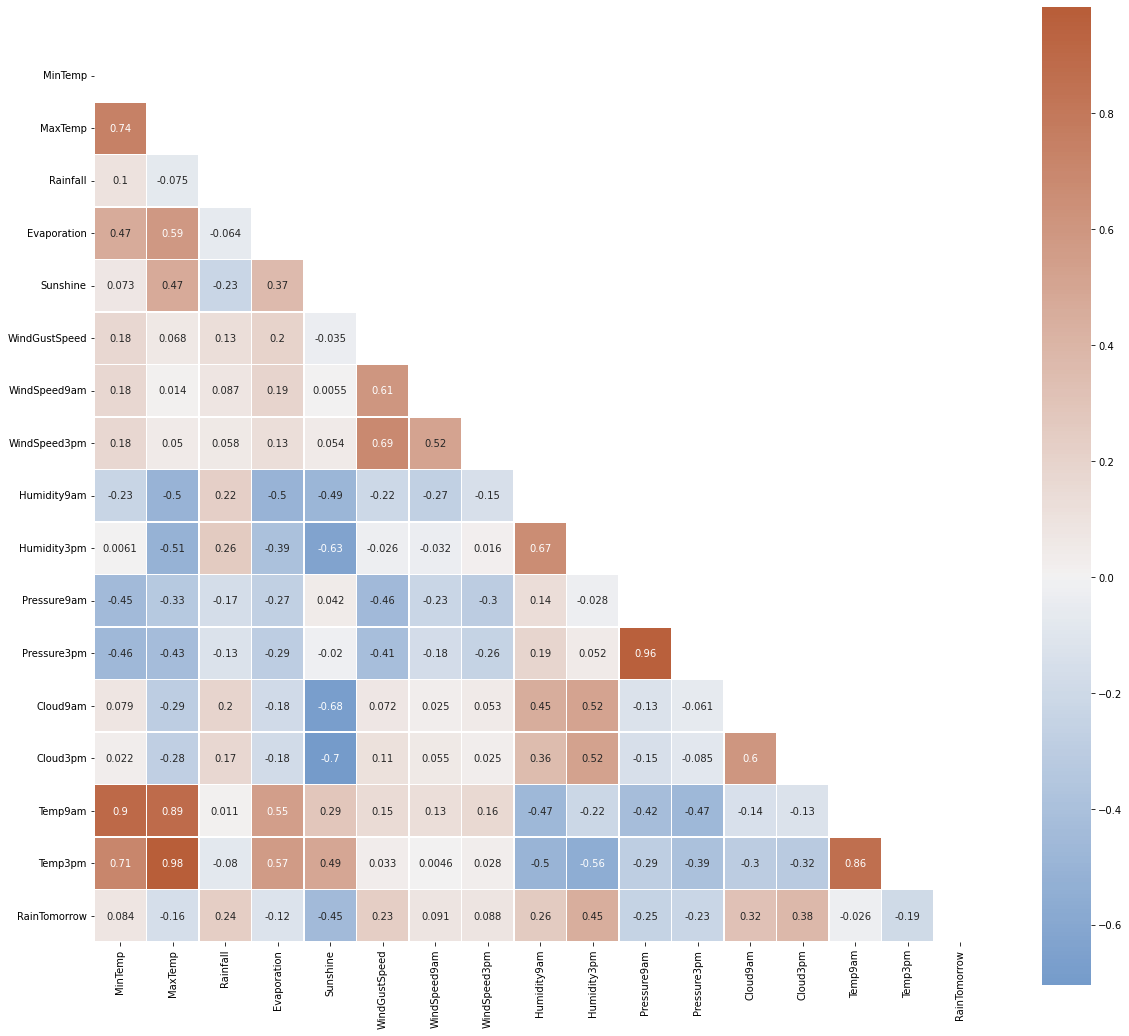

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = rainfall.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

**Observation Noted**

From the above correlation heat map, we can conclude that :-

* MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.91).

* Temp9am and MinTemp variables are highly positively correlated (correlation coefficient = 0.91)

* Temp3pm and MinTemp variables are positively correlated (correlation coefficient = 0.69)

* Temp3pm and MaxTemp variables are highly positively correlated (correlation coefficient = 0.98)

* Temp3pm and Temp9am variables are highly positively correlated (correlation coefficient = 0.84)

* Temp9am and MaxTemp variables are highly positively correlated (correlation coefficient = 0.87)

* Pressure3pm and Pressure9am variables are also highly positively correlated (correlation coefficient = 0.96)

* WindSpeed3pm and WindGustSpeed variables are positively correlated (correlation coefficient = 0.70)


**Let's do something else**

**PairPlot**

* Let's plot for highly positively correlated coefficients

In [142]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

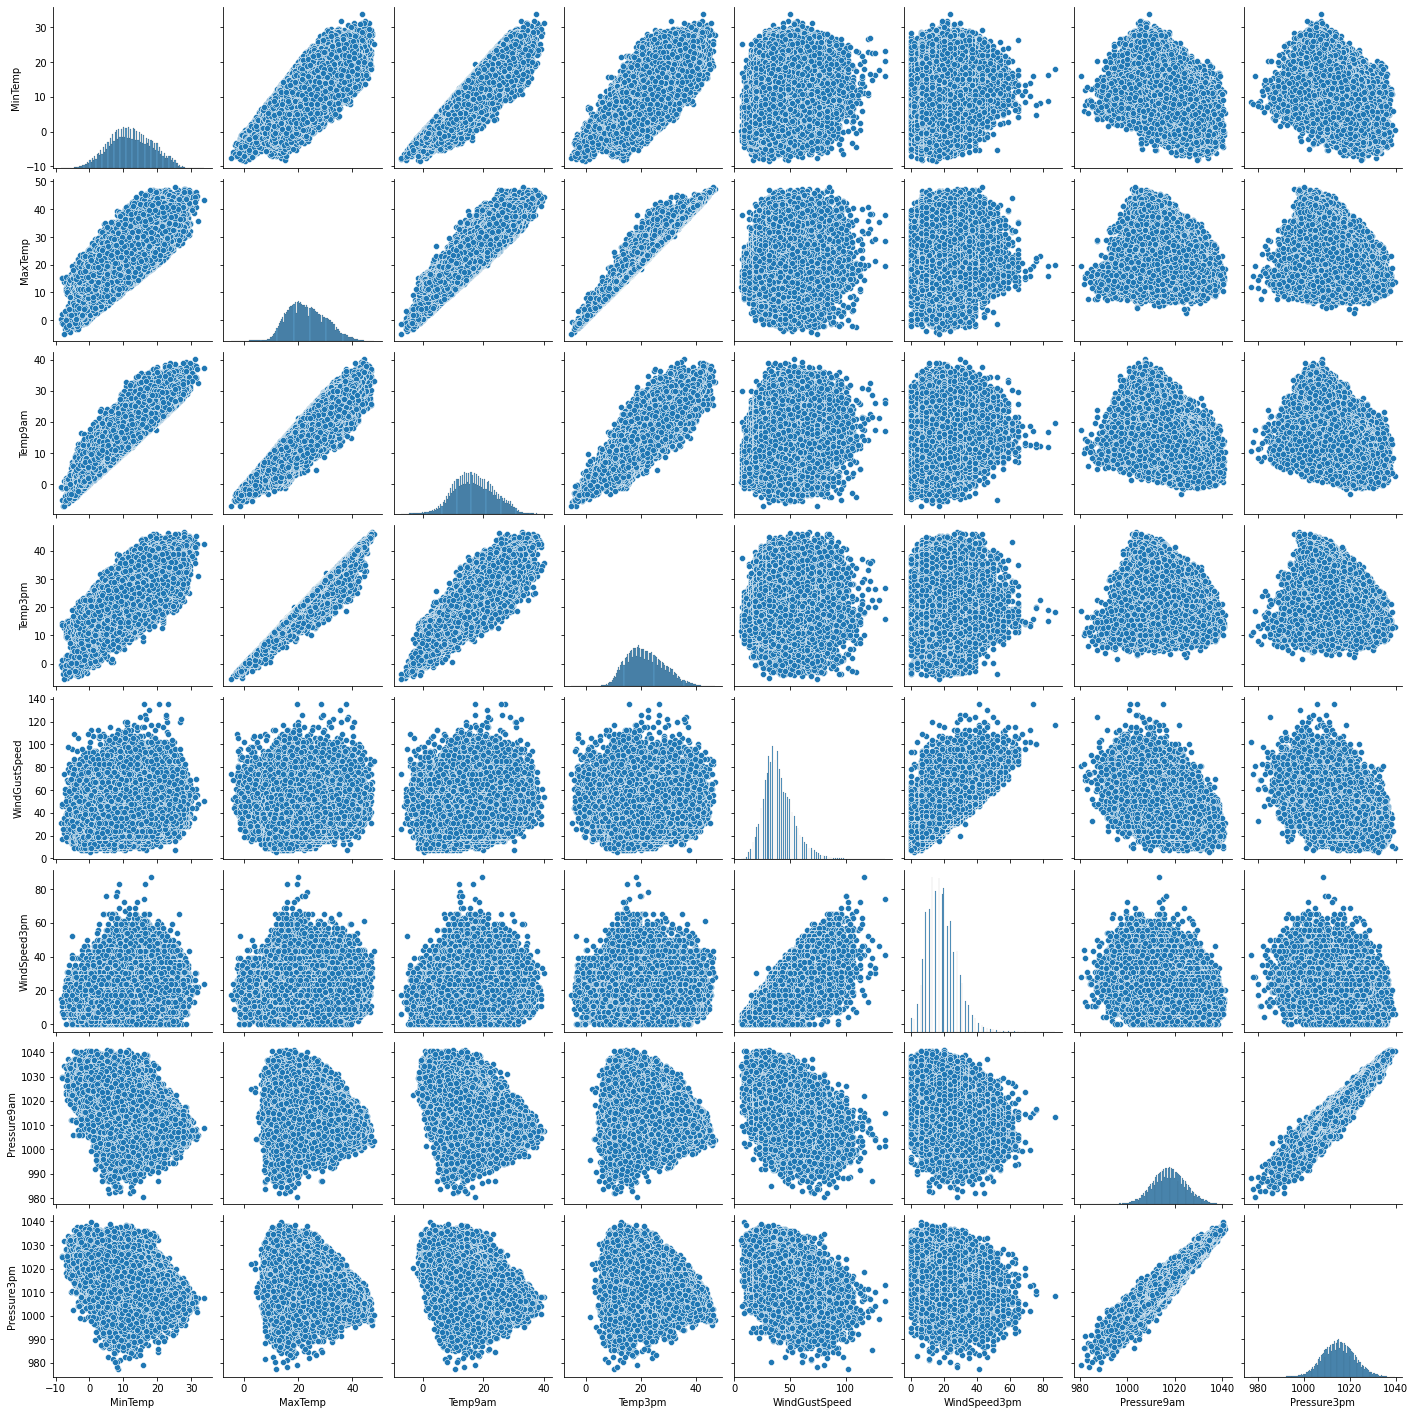

In [143]:
sns.pairplot(rainfall[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

###**Declear Variables**

**What to do ?**

* Declear Feature and Target Variables for model buildings


In [144]:
X = rainfall.drop(['RainTomorrow'], axis=1)
y = rainfall['RainTomorrow']

**Note**

* since we now know the target and features variables, let's split the dataset into training and test split dataset.

* Chaeck the shape of the train and test split

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2020)

In [146]:
X_train.shape, X_test.shape

((116368, 22), (29092, 22))

### **Feature Engineering**

We would:
1. Transform raw data into useful information to help us understand our model better
2. Improve the model predictive power

In [147]:
X_train.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

In [148]:
# Display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [149]:
# Display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

**Observations**

There are quite some missing values in the dataset

1. Fix the missing numerical and categorical varaibles

#### **Numerical Variables**

In [150]:
# Check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp           1207
MaxTemp           1009
Rainfall          2636
Evaporation      50361
Sunshine         55967
WindGustSpeed     8238
WindSpeed9am      1428
WindSpeed3pm      2464
Humidity9am       2143
Humidity3pm       3595
Pressure9am      12140
Pressure3pm      12110
Cloud9am         44811
Cloud3pm         47541
Temp9am           1437
Temp3pm           2876
dtype: int64

In [151]:
# Check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp            278
MaxTemp            252
Rainfall           625
Evaporation      12429
Sunshine         13868
WindGustSpeed     2025
WindSpeed9am       339
WindSpeed3pm       598
Humidity9am        511
Humidity3pm        912
Pressure9am       2925
Pressure3pm       2918
Cloud9am         11077
Cloud3pm         11817
Temp9am            330
Temp3pm            733
dtype: int64

**My Observations**

I assumed that the missing data's are missing at random, so i will fix it with one of two method's
1. **Median method**

    Medium imputation is used when there are outliers in a dataset, and if you noticed there are outliers in the numerical dataset, also medium outliers are robust to outliers.

    i will impute missing values with apprepraite statistical measures of this data.

    Imputation should be done with the training dataset and then propagated to the test dataset. it means the statistical measures to be used to fill missing values both in train and test sets should be extracted in the test set only to avoid overfitting.

2. **Mean Method**

In [154]:
# Impute missing values in X_train and X_test with respective column median in X_train
for new_df in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        new_df[col].fillna(col_median, inplace=True)

In [155]:
# Now lets recheck for the missing datas in numerical variables
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [156]:
# check missing values in numerical variables in X_test
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

#### **Catergorical Variables**

In [157]:
# Impute missing categorical variables with most frequent value

for new_df2 in [X_train, X_test]:
    new_df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    new_df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    new_df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    new_df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [158]:
# Check missing values in categorical variables in X_train
X_train[categorical].isnull().sum()

Date           0
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [159]:
# Check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()

Date           0
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

####**Engineering outliers in numerical variables** 

We have seen that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [165]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 8.8)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 20.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 59)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)
    df3['WindGustSpeed'] = max_value(df3, 'WindGustSpeed', 107)

**What to do ?**

Let's see the effect of the outliers modified earlier

In [168]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.213205,23.241664,1.239977,5.142697,8.047502,39.939184,14.012967,18.663387,68.855416,51.543087,1017.632520,1015.237744,4.657174,4.707548,17.015812,21.690689
std,6.368726,7.085654,2.609457,2.787158,2.760508,13.088269,8.823454,8.694233,18.879620,20.482829,6.714981,6.648435,2.280812,2.104482,6.449748,6.848505
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,982.200000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.200000,8.300000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.400000,16.800000
50%,12.000000,22.700000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.700000,1019.300000,6.000000,6.000000,21.500000,26.300000
max,31.400000,48.100000,8.800000,20.800000,14.500000,107.000000,59.000000,57.000000,100.000000,100.000000,1040.900000,1039.600000,9.000000,9.000000,40.200000,46.700000


**Encode RainToday Variable**

In [170]:
!pip install category_encoders

In [171]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [172]:
X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1
46127,2009-04-24,Canberra,7.0,16.8,0.0,2.8,1.0,NNW,96.0,N,...,91.0,75.0,1011.9,1006.2,7.0,8.0,10.4,15.1,0,1
92304,2014-10-24,GoldCoast,17.5,25.5,0.0,4.8,8.5,NE,35.0,NNE,...,52.0,55.0,1022.6,1019.8,5.0,5.0,24.9,24.1,0,1
12579,2010-05-28,Moree,9.0,22.3,0.0,2.2,5.8,NE,37.0,ENE,...,79.0,50.0,1020.6,1015.1,6.0,6.0,14.6,20.4,0,1
139399,2009-04-15,Darwin,26.5,33.5,6.2,6.2,9.5,S,52.0,N,...,80.0,64.0,1009.6,1005.7,7.0,7.0,30.2,32.8,1,0
35901,2015-10-07,SydneyAirport,19.0,20.3,0.0,13.2,1.3,S,78.0,SSE,...,63.0,68.0,1029.6,1033.7,5.0,7.0,19.5,18.0,0,1


**Observation**

You noticed after encoding, Col RainToday = RainToday_0 and RainToday_1

**Now let's create the x_train and X_test dataset**

**Note** : Remember Dummy variables we did earlier



In [173]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [174]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
46127,7.0,16.8,0.0,2.8,1.0,96.0,0.0,15.0,91.0,75.0,...,0,0,0,0,0,0,0,0,0,0
92304,17.5,25.5,0.0,4.8,8.5,35.0,15.0,30.0,52.0,55.0,...,0,0,0,0,0,0,0,0,0,0
12579,9.0,22.3,0.0,2.2,5.8,37.0,11.0,24.0,79.0,50.0,...,0,0,0,0,0,0,0,0,0,0
139399,26.5,33.5,6.2,6.2,9.5,52.0,6.0,20.0,80.0,64.0,...,1,0,0,0,0,0,0,0,0,0
35901,19.0,20.3,0.0,13.2,1.3,78.0,46.0,31.0,63.0,68.0,...,0,0,0,0,1,0,0,0,0,0


In [175]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [176]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
78274,8.5,17.4,0.2,7.6,4.1,57.0,28.0,28.0,64.0,42.0,...,1,0,0,0,0,0,0,0,0,0
112858,9.6,17.2,6.2,4.8,8.5,22.0,9.0,17.0,70.0,52.0,...,0,0,0,0,0,0,0,0,0,0
61665,12.5,18.2,0.0,4.6,5.9,69.0,33.0,35.0,67.0,53.0,...,0,0,0,0,0,0,0,1,0,0
124698,11.4,18.9,2.0,4.8,8.5,41.0,22.0,22.0,78.0,39.0,...,0,0,0,0,0,0,0,0,0,1
29174,6.9,27.1,0.0,4.8,8.5,35.0,7.0,19.0,73.0,26.0,...,0,0,0,0,0,0,0,0,0,0


### **Feature Scaling**

In Feature Scaling, we try to change the data in such a way that the model can process it without any problems. And Feature Scaling is one such process in which we transform the data into a better version. Feature Scaling is done to normalize the features in the dataset into a finite range.

In [179]:
cols = X_train.columns

In [180]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**To clear doubts for X_train and X_test**

If you would fit the scaler using x_test you would be using information from your test set and would be leaking data. This is information that you would not have if your model was in production and can therefore not use when fitting your model.

In [181]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [182]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [184]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.383838,0.408318,0.000000,0.134615,0.068966,0.891089,0.000000,0.263158,0.91,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.648990,0.572779,0.000000,0.230769,0.586207,0.287129,0.254237,0.526316,0.52,0.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.434343,0.512287,0.000000,0.105769,0.400000,0.306931,0.186441,0.421053,0.79,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.876263,0.724008,0.704545,0.298077,0.655172,0.455446,0.101695,0.350877,0.80,0.64,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.686869,0.474480,0.000000,0.634615,0.089655,0.712871,0.779661,0.543860,0.63,0.68,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [189]:
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,...,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000
mean,0.512814,0.527741,0.142425,0.246319,0.551689,0.337023,0.238792,0.327644,0.690846,0.515946,...,0.052832,0.059810,0.069091,0.102021,0.064966,0.056957,0.063935,0.070947,0.060635,0.065276
std,0.160439,0.134179,0.297268,0.133438,0.192032,0.130364,0.151356,0.152766,0.187572,0.204256,...,0.223703,0.237139,0.253613,0.302681,0.246471,0.231765,0.244641,0.256741,0.238664,0.247016
min,-0.007576,0.020794,0.000000,0.000000,0.000000,0.029703,0.000000,0.000000,0.010000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.398990,0.427221,0.000000,0.192308,0.558621,0.247525,0.118644,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.510101,0.517958,0.000000,0.230769,0.586207,0.326733,0.220339,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.628788,0.620038,0.068182,0.250000,0.593103,0.396040,0.322034,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.063131,0.973535,1.000000,1.000000,0.986207,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Saving the X_train, y_train and X_test, y_test as csv**

In [186]:
X_train.to_csv('X_train.csv', index = None, header = True)
y_train.to_csv('y_train.csv', index = None, header = True)
X_test.to_csv('X_test.csv', index = None, header = True)
y_test.to_csv('y_test.csv', index = None, header = True)

**Now our dataset is ready for prediction**

